**Pandas** является библиотекой для обработки и анализа данных.   

https://pandas.pydata.org/pandas-docs/stable/    
[Pandas lessons](https://bitbucket.org/hrojas/learn-pandas)

Данные часто хранятся в форме таблиц — например, в форматах .csv, .tsv или .xlsx. С помощью библиотеки Pandas такие табличные данные очень удобно загружать, обрабатывать и анализировать с помощью SQL-подобных запросов. А в связке с библиотеками **Matplotlib** и **Seaborn Pandas** предоставляет широкие возможности визуального анализа табличных данных.

Основными структурами данных в **Pandas** являются классы **Series** и **DataFrame**.

**Series** - одномерный индексированный массив данных некоторого фиксированного типа. Если индекс явно не задан, то pandas автоматически создаёт RangeIndex от 0 до N-1, где N общее количество элементов.



In [8]:
import pandas as pd
my_series = pd.Series(range(0,10,2))
my_series

0    0
1    2
2    4
3    6
4    8
dtype: int64

Индексы можно задавать явно:

In [39]:
my_series2 = pd.Series([2, 4, 6, 8, 10, 12], index=['a', 'b', 'c', 'd', 'e', 'f'])
my_series2['f']

12

 выборка по нескольким индексам и групповое присваивание:

In [40]:
print(my_series2[['a','c','e']])
my_series2[['a','c','e']] =7
my_series2

a     2
c     6
e    10
dtype: int64


a     7
b     4
c     7
d     8
e     7
f    12
dtype: int64

Можно отфильтровать элементы, изменить индексы:

In [41]:
print(my_series2[my_series2 > 7])
print(my_series2[my_series2 > 0] * 2)
my_series2.index = ['A', 'B', 'C', 'D','E',"F"]
my_series2

d     8
f    12
dtype: int64
a    14
b     8
c    14
d    16
e    14
f    24
dtype: int64


A     7
B     4
C     7
D     8
E     7
F    12
dtype: int64

**DataFrame**

двухмерная структура данных, представляющая собой таблицу, каждый столбец которой содержит данные одного типа. Можно представлять её как словарь объектов типа **Series**. 

**DataFrame** удобно конструировать используя словарь **python**:



In [43]:
df = pd.DataFrame({
     'country': ['USA', 'India', 'China', 'Ukraine'],
     'population': [295734100, 1080264400, 1306313800, 47425300],
     'square': [9629091, 3287590, 9596960, 603700],
     "density (pop./km2)": [30.71, 328.59, 136.12, 78.56]    
 })

df


,country,population,square,density (pop./km2)
0,USA,295734100,9629091,30.71
1,India,1080264400,3287590,328.59
2,China,1306313800,9596960,136.12
3,Ukraine,47425300,603700,78.56


In [45]:
print(df['country'])
type(df['country'])

0        USA
1      India
2      China
3    Ukraine
Name: country, dtype: object


pandas.core.series.Series

In [125]:
df.index = ['US', 'IN', 'CH', 'UA']
df.index.name = 'Country Code'
df

,country,population,square,density (pop./km2)
Country Code,,,,
US,USA,295734100,9629091,30.71
IN,India,1080264400,3287590,328.59
CH,China,1306313800,9596960,136.12
UA,Ukraine,47425300,603700,78.56


Сортировка:

In [126]:
df.sort_values(by='country') 

,country,population,square,density (pop./km2)
Country Code,,,,
CH,China,1306313800,9596960,136.12
IN,India,1080264400,3287590,328.59
US,USA,295734100,9629091,30.71
UA,Ukraine,47425300,603700,78.56


Доступ к строкам по индексу возможен несколькими способами:

- **.loc** - используется для доступа по строковой метке. В качестве входящего параметра может принимать: метку, список меток, срез с метками   
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.loc.html
- **.iloc** - используется для доступа по числовому значению (начиная от 0)

In [49]:
df.loc['UA']

country                Ukraine
population            47425300
square                  603700
density (pop./km2)       78.56
Name: UA, dtype: object

Можно делать выборку по индексу и интересующим колонкам:

In [50]:
df.loc[['CH', 'UA'], 'population']

Country Code
CH    1306313800
UA      47425300
Name: population, dtype: int64

In [51]:
df.loc[df['density (pop./km2)']<100]

,country,population,square,density (pop./km2)
Country Code,,,,
US,USA,295734100,9629091,30.71
UA,Ukraine,47425300,603700,78.56


In [52]:
df.loc[df['density (pop./km2)']<100,['country']]

,country
Country Code,
US,USA
UA,Ukraine


можно использовать срезы:

In [53]:
df.loc['IN':'UA',:'square']

,country,population,square
Country Code,,,
IN,India,1080264400,3287590
CH,China,1306313800,9596960
UA,Ukraine,47425300,603700




Можно добавлять, удалять столбцы. Рассмотрим работу с **DataFrame** на конкретном примере и попробуем проанализировать данные.

Будем работать с файлом в формате **csv**. Это текстовый формат, в которм каждая строка файла - это одна строка таблицы, колонки разделяются спец. символом.

Вы можете найти [Kaggle](https://www.kaggle.com/datasets) можество различных датасетов.
Кстати, [тут](https://www.kaggle.com/learn/overview) можно найти и мини курсы Python, machine learning.   
Мы будем работать с данными о пассажирах Титаника.
Данный взяты [тут](https://www.kaggle.com/c/titanic/data). 

Необходимо скачать файл **train.csv**. Вы  по ссылке выше можете посмотреть, что означает каждое поле из датасета.
Приступим к работе. 

Variable|	Definition|	Key
---------|-------------|------
survival|	Survival	|0 = No, 1 = Yes
pclass	|Ticket class	|1 = 1st, 2 = 2nd, 3 = 3rd
sex	|Sex	|
Age|	Age in years|	
sibsp|	# of siblings / spouses aboard the Titanic	|
parch	|# of parents / children aboard the Titanic	|
ticket|	Ticket number	|
fare	|Passenger fare	|
cabin	|Cabin number	|
embarked	|Port of Embarkation|	C = Cherbourg, Q = Queenstown, S = Southampton

Для того чтобы узнать общие сведения об объекте **DataFrame**, можно воспользоваться методом **DataFrame.info()**. Благодаря этому методу можно узнать о размере объекта, о типах данных и об использовании памяти.

In [102]:
data = pd.read_csv('titanic.csv')
data.index.name ='PassengerId'
print(data.info())
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None
(891, 12)


Итак, мы видим имена колонок (их 11), и всего имеем 891 строку. 
Выведем первые 5 строк (или шапка таблицы. Можно было бы вывести и так: data[:5]) :

In [103]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Метод **describe** показывает основные статистические характеристики данных по каждому числовому признаку. Без указания не числового признака, метод **describe** выводит: число непропущенных значений, среднее, стандартное отклонение, диапазон, медиану, 0.25 и 0.75 квартили. Однако, у нас  5 признаков типа object. Поэтому необходимо явно указать интересующий нас тип: 

In [104]:
data.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Swift, Mrs. Frederick Joel (Margaret Welles Ba...",male,CA. 2343,C23 C25 C27,S
freq,1,577,7,4,644


In [105]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Посчитаем количество мужчин и женщин:

In [113]:
#data.groupby(['Sex']).count()
data['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Рассмотрим еще логическую индексацию **DataFrame** по одному столбцу. Выглядит она следующим образом: **df[P(df['Name'])]**, где P  - это некоторое логическое условие, проверяемое для каждого элемента столбца Name. Итогом такой индексации является **DataFrame**, состоящий только из строк, удовлетворяющих условию P по столбцу **Name**. 

Воспользуемся этим для ответа на вопрос:    
отберем пассажиров-женщин, которые ехали первым классом и отсортируем их по количеству детей

In [178]:
data[(data['Sex'] == 'female') & 
     (data['Pclass'] ==1)].sort_values(by='Parch',
                               ascending=False)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,,
341,342,1,1,"Fortune, Miss. Alice Elizabeth",female,24.0,3,2,19950,263.0000,C23 C25 C27,S
763,764,1,1,"Carter, Mrs. William Ernest (Lucile Polk)",female,36.0,1,2,113760,120.0000,B96 B98,S
435,436,1,1,"Carter, Miss. Lucile Polk",female,14.0,1,2,113760,120.0000,B96 B98,S
742,743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
585,586,1,1,"Taussig, Miss. Ruth",female,18.0,0,2,110413,79.6500,E68,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S
540,541,1,1,"Crosby, Miss. Harriet R",female,36.0,0,2,WE/P 5735,71.0000,B22,S
311,312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C


**DataFrame** имеет замечательный метод **groupby**. Он имеет вид:

    df.groupby(by=grouping_columns)[columns_to_show].function()
 
 - **grouping_columns**  - данные датафрейма разделяются  по заданнному  признаку/признакам.
 - **columns_to_show** - название признака для отображения (что нас интересует). Если не указано, будут отображены все столбцы таблицы
 - **function()** - к полученным данным применяется функция

In [116]:
data.groupby(['Sex'])['PassengerId'].count()

Sex
female    314
male      577
Name: PassengerId, dtype: int64

In [117]:
data.groupby('Survived').count()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Survived,,,,,,,,,,,
0,549,549,549,549,424,549,549,549,549,68,549
1,342,342,342,342,290,342,342,342,342,136,340


Давайте посчитаем, сколько выжило мужчин и женщин по отдельности. Для этого необходимо сгрупировать по признакам **Sex** и **Survived**

In [106]:
data.groupby(['Sex', 'Survived'])['PassengerId'].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: PassengerId, dtype: int64

Интересно узнать, а кого больше выжило в зависимости от типа класса каюты:

In [107]:
data.groupby(['Pclass', 'Survived'])['PassengerId'].count()

Pclass  Survived
1       0            80
        1           136
2       0            97
        1            87
3       0           372
        1           119
Name: PassengerId, dtype: int64

Бывает удобно отобразить информацию в виде **таблицы сопряженности**. Для этого используется метод **crosstab**:


In [123]:
pd.crosstab(data['Pclass'], data['Survived'], margins=True)

Survived,0,1,All
Pclass,,,
1,80,136,216
2,97,87,184
3,372,119,491
All,549,342,891


Можно узнать среднее значение по признаку (mean()) или медиану (median())
Например, нам интересен средний возраст на корабле:

In [119]:
ages = data.Age.dropna() 
ages.mean(), ages.median() 

(29.69911764705882, 28.0)

**dropna()**  используется, чтоб отбросить значения NaN.

Попробуйте ответить сами на вопросы из [тетрадки](https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic01_pandas_data_analysis/lesson1_practice_pandas_titanic.ipynb)


Еще примеры работы с данными c Pandas:
 
 - https://habr.com/ru/company/ruvds/blog/442516/
 - https://habr.com/ru/company/ods/blog/322626/
 - https://khashtamov.com/ru/pandas-introduction/
 - [тут](https://github.com/Yorko/mlcourse.ai/blob/master/jupyter_russian/topic01_pandas_data_analysis/lesson1_part1_pandas_intro.ipynb) отличный разбор работы с pandas

Рассмотрим датасет по успеваемости. Поэксперементируем с ним.

In [128]:
stud_rezults = pd.read_csv("AcademicScores.csv")
stud_rezults.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 10 columns):
Names           19 non-null object
Mathematics     19 non-null int64
English         19 non-null int64
Physics         19 non-null int64
Chemistry       19 non-null int64
Biology         19 non-null int64
Economics       19 non-null int64
Computer std    19 non-null int64
Governmnet      19 non-null int64
Total           19 non-null int64
dtypes: int64(9), object(1)
memory usage: 1.6+ KB


In [129]:
stud_rezults.head()

,Names,Mathematics,English,Physics,Chemistry,Biology,Economics,Computer std,Governmnet,Total
0,Kuzi Kros,45,76,75,65,51,54,71,65,502
1,Lucky Oyams,90,89,84,91,71,87,90,71,673
2,Mota Solo,91,90,82,87,63,88,90,70,661
3,Rita Robi,34,76,74,64,67,65,68,65,513
4,Roblyn Kris,45,67,45,67,84,53,90,71,522


Интересно, у кого лучшая успеваемость. Воспользуемся методом сортировки **sort_values**. Его параметры:

- by: Single/List of column names to sort Data Frame by.  
- axis: 0 or ‘index’ for rows and 1 or ‘columns’ for Column.
- ascending: Boolean value which sorts Data frame in ascending order if True.
- inplace: Boolean value. Makes the changes in passed data frame itself if True.
- kind: String which can have three inputs(‘quicksort’, ‘mergesort’ or ‘heapsort’) of algorithm used to sort data frame.
- na_position: Takes two string input ‘last’ or ‘first’ to set position of Null values. Default is ‘last’.

Можно сортировать по значению какого-то из признаков. Отсортируем по признаку "Total"

In [137]:
stud_rezults.sort_values("Total", axis = 0, ascending = False, 
                 inplace = True, na_position ='first') 
stud_rezults

,Names,Mathematics,English,Physics,Chemistry,Biology,Economics,Computer std,Governmnet,Total
1,Lucky Oyams,90,89,84,91,71,87,90,71,673
6,Emma Kuete,87,86,80,90,86,78,97,60,664
2,Mota Solo,91,90,82,87,63,88,90,70,661
13,Ehinor Omon,89,85,80,83,79,79,95,59,649
12,Joshua Ifyn,89,86,85,67,87,78,90,57,639
8,Vaness Bliss,87,86,78,80,83,65,75,65,619
18,Manuel Steph,54,32,78,75,93,79,73,78,562
15,Suruz Kramo,78,65,87,83,68,64,56,53,554
4,Roblyn Kris,45,67,45,67,84,53,90,71,522
3,Rita Robi,34,76,74,64,67,65,68,65,513


Интересно, по какому предмету лучше средняя успеваемость

In [144]:
st_rez_for_plot = stud_rezults.median()
st_rez_for_plot

Mathematics      65.0
English          65.0
Physics          74.0
Chemistry        67.0
Biology          79.0
Economics        65.0
Computer std     73.0
Governmnet       65.0
Total           513.0
dtype: float64

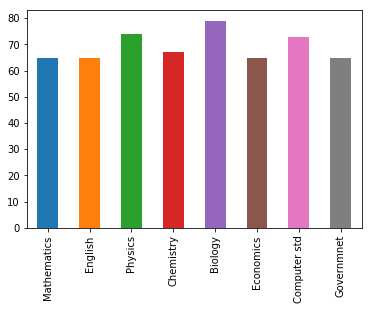

In [143]:
st_rez_for_plot[:-1].plot(kind='bar')

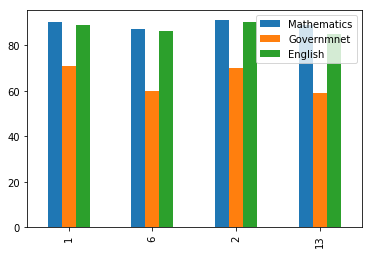

In [166]:
import matplotlib.pyplot as plt
df1 = stud_rezults[["Mathematics","Governmnet","English"]]
df1[:4].plot.bar() 
  
# plot between 3 attributes 
plt.show() 

 у кого из студентов бал по математике выше 60?

In [175]:
stud_rezults[stud_rezults['Mathematics'] >60]


,Names,Mathematics,English,Physics,Chemistry,Biology,Economics,Computer std,Governmnet,Total
1,Lucky Oyams,90,89,84,91,71,87,90,71,673
6,Emma Kuete,87,86,80,90,86,78,97,60,664
2,Mota Solo,91,90,82,87,63,88,90,70,661
13,Ehinor Omon,89,85,80,83,79,79,95,59,649
12,Joshua Ifyn,89,86,85,67,87,78,90,57,639
8,Vaness Bliss,87,86,78,80,83,65,75,65,619
15,Suruz Kramo,78,65,87,83,68,64,56,53,554
10,Softl Jikn,61,43,50,78,92,43,56,67,490
16,Roy Romeo,65,54,59,56,65,64,67,59,489
7,Tony Pal,65,54,53,64,84,45,56,64,485


 у кого из студентов бал по математике и компьютерным техн. выше 60?

In [174]:
stud_rezults[(stud_rezults['Mathematics'] >60) &  (stud_rezults['Computer std'] >60)]

,Names,Mathematics,English,Physics,Chemistry,Biology,Economics,Computer std,Governmnet,Total
1,Lucky Oyams,90,89,84,91,71,87,90,71,673
6,Emma Kuete,87,86,80,90,86,78,97,60,664
2,Mota Solo,91,90,82,87,63,88,90,70,661
13,Ehinor Omon,89,85,80,83,79,79,95,59,649
12,Joshua Ifyn,89,86,85,67,87,78,90,57,639
8,Vaness Bliss,87,86,78,80,83,65,75,65,619
16,Roy Romeo,65,54,59,56,65,64,67,59,489
17,Steve Daniel,78,34,43,45,87,67,67,56,477
